### Titanic 연습

#### 필요한 것들 import

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 그래프를 그리기 위해서 import

#### 데이터 로드 및 EDA

In [13]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
female_sur = pd.read_csv("gender_submission.csv")

In [3]:
# train이 잘 불러와졌는지 head로 데이터 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# test가 잘 불러와졌는지 head로 데이터 확인
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# train의 타입 확인
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
#test 타입 확인
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# 일단, train을 먼저 봐보자
# info를 이용해 전체적인 내용 확인

train.info()

# 결과값을 보면 Age, Cabin에 Null값이 있는 것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# describe()를 이용해 전체적인 통계 내용 확인
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
# 변수들의 의미
'''
'PassengerId': 승객 번호 (Index번호로, 의미 없지만 정답을 맞출때 사용 됨)
'Survived' : 생존여부 / 0: 사망 , 1: 생존
'Pclass' : 티켓 class / 1 = 1등석 , 2 = 2등석, 3 = 3등석
'Name' : 이름
'Sex' : 성별
'Age' : 나이
'SibSp' : 타이타닉 호에 승선한 형제자매/배우자 수 (sibling : 형제,자매 / spouse : 남편,아내)
'Parch' : 타이타닉 호에 승선한 부모,자식 수 (parent : 엄마, 아빠 / child : 아들, 딸) 
'Ticket': 티켓 번호
'Fare' : 여객 운임 (고객들이 낸 돈이라고 생각하면 되려나?)
'Cabin' : 객실 번호
'Embarked' : 승선항 (승선 한 항구)

'''


print(len(train[(train.Survived==1)]))
print(len(train))

342
891


In [42]:
# 일단.. 살아남은 사람과 아닌 사람의 수를 봐보자
# 살아남은 사람 342 , 살아남지 못한 사람 549
# 살아남은 사람의 데이터를 좀 더 자세히 봐보자

print(len(train[(train.Survived==1)]))
print(len(train[(train.Survived!=1)]))

342
549


### train 살아남은 사람들의 데이터 자세히 확인

In [44]:
# 살아남은 사람들을 train_sur에 할당
train_sur=train[(train.Survived==1)]

#### 나이 확인해보기

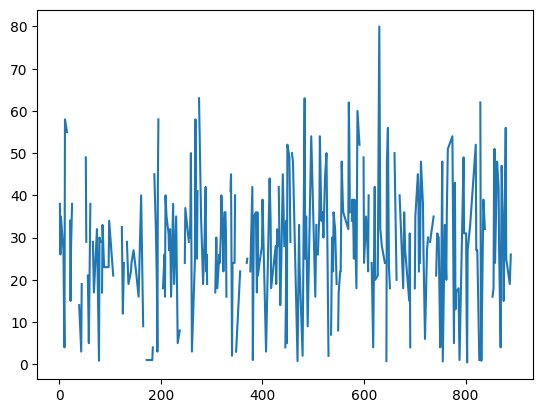

In [50]:
# 살아남은 사람의 나이 확인
# 꺾은선 그래프라 알아보기 힘듦
plt.plot(train_sur.Age)
plt.show()

<BarContainer object of 342 artists>

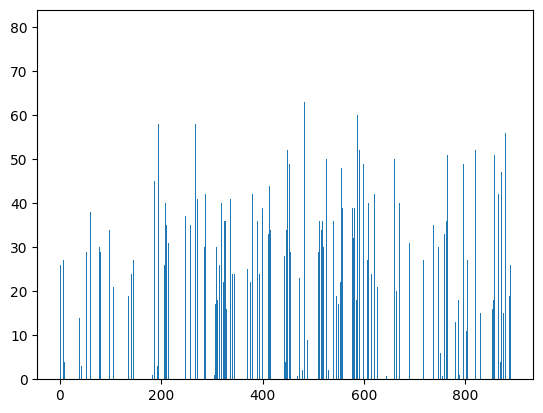

In [56]:
# 막대 그래프로 그려봄, 하지만 나이가 묶여있지 않아 중구난방하게 보임
# 10대, 20대, 30대 ,,, 로 묶어야 할 필요가 보임
plt.bar(train_sur.Age.index,train_sur.Age.values)

In [60]:
# 나이대를 설정하기 위해서 최소, 최대값 확인
print(train_sur.Age.min())
print(train_sur.Age.max())

0.42
80.0


In [64]:
# 0세~9세 :  0=< Age < =9
# 10대 : 10 <= Age <= 19
# 20대 : 20 <= Age <= 29
# 30대 : 30 <= Age <= 39
# 40대 : 40 <= Age <= 49
# 50대 : 50 <= Age <= 59
# 60대 : 60 <= Age <= 69
# 70대, 80까지 : 70 <= Age <= 80
train_sur.Age.values <= 19

array([False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
        True, False,  True, False,  True,  True,  True, False, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [73]:
# 음.. 이 이후에 어떻게 해야할까? 생각을 해보자 나이대 별로 묶으려면..
train_sur[(train.Age<=19)&(train.Age>=0)]


/tmp/ipykernel_3953/3605789354.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_sur[(train.Age<=19)&(train.Age>=0)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
